# Import Dependecy Matrix

X-Axis: Supply Concentration Risk (HHI): Are we buying from many safe countries (Low Risk) or dependent on just one dominant supplier (High Risk)?

Y-Axis: Strategic Economic Importance (Import Value): How much money are we spending? Is it a niche mineral or a massive drain on the exchequer?

Bubble Size: Import Growth Rate. Is the dependency getting worse?

# Herfindahl-Hirschman Index (HHI)
(The Herfindahl-Hirschman Index (HHI) is a common measure of market concentration and a key indicator of the competitiveness of an industry)

HHI < 1,500: Safe / Competitive Market.

HHI > 2,500: Highly Concentrated (Monopoly Risk).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def analyze_mineral(filename, mineral_name):
    # Load Data

    df = pd.read_excel(filename)

    # Clean Data
    df = df[df['Country/Region'] != 'Total']

    # Identify Date Columns (All columns except Country)
    date_cols = [c for c in df.columns if c not in ['Country/Region', 'Total']]


    last_12_cols = date_cols[-12:]
    recent_import_value = df[last_12_cols].sum().sum()

    df['Recent_Total'] = df[last_12_cols].sum(axis=1)
    total_market = df['Recent_Total'].sum()
    df['Market_Share'] = (df['Recent_Total'] / total_market) * 100
    hhi = (df['Market_Share'] ** 2).sum()


    first_12_cols = date_cols[:12]
    start_val = df[first_12_cols].sum().sum()
    end_val = recent_import_value
    years = (len(date_cols) / 12)
    if start_val > 0:
        cagr = ((end_val / start_val) ** (1/years)) - 1
    else:
        cagr = 0

    return {
        'Mineral': mineral_name,
        'Import_Value_USD': recent_import_value,
        'Supply_Risk_HHI': hhi,
        'Growth_Rate': cagr * 100, # In %
        'Top_Supplier': df.sort_values('Recent_Total', ascending=False).iloc[0]['Country/Region']
    }

In [3]:
minerals_data = [
    analyze_mineral('Copper import Forecasting.xlsx', 'Copper'),
    analyze_mineral('Lithium import Forecasting.xlsx', 'Lithium'),
    analyze_mineral('Graphite import Forecsting.xlsx', 'Graphite')
]

In [4]:
df_matrix = pd.DataFrame(minerals_data)

In [5]:
df_matrix

,Mineral,Import_Value_USD,Supply_Risk_HHI,Growth_Rate,Top_Supplier
0,Copper,14407.14,773.008160,7.277269,JAPAN
1,Lithium,90.26,2578.886148,3.645206,U ARAB EMTS
2,Graphite,72.40,4673.402063,15.387034,CHINA P RP


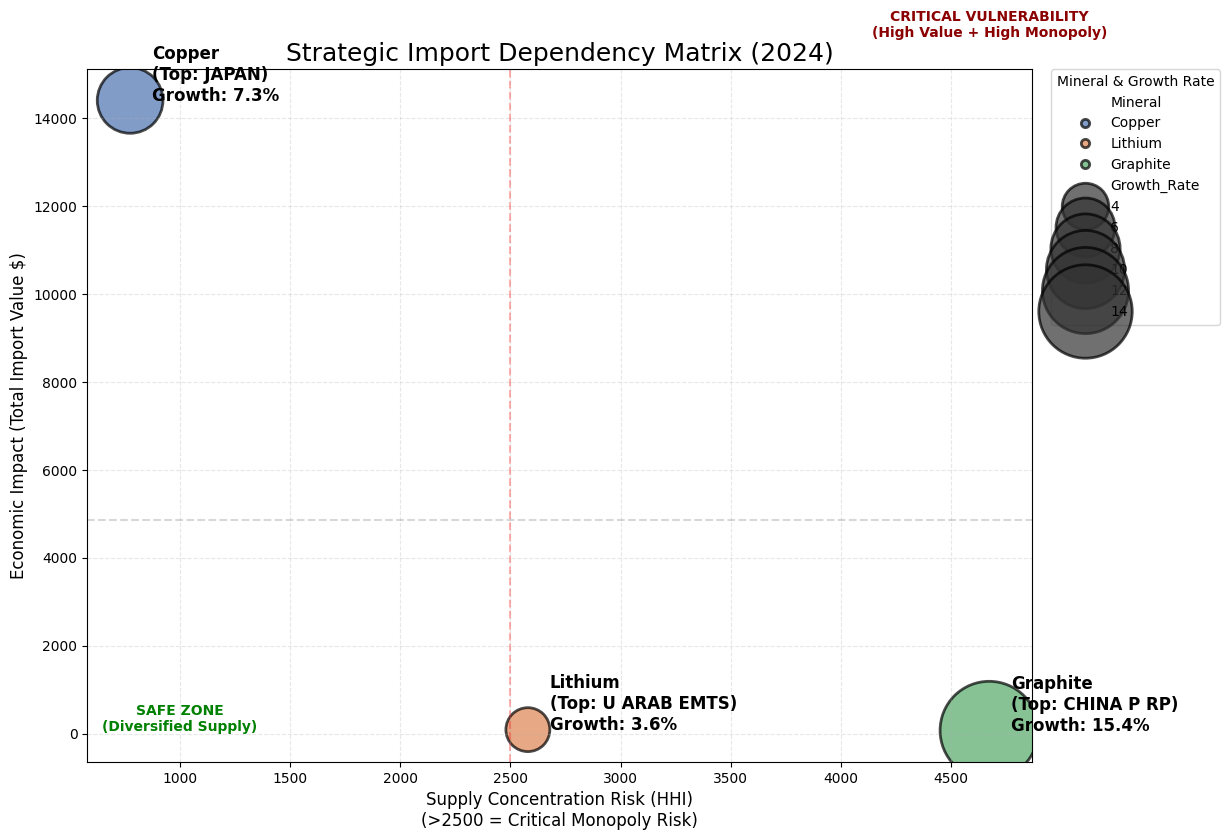

In [ ]:

plt.figure(figsize=(14, 9))

# Create Scatter Plot

scatter = sns.scatterplot(data=df_matrix, x='Supply_Risk_HHI', y='Import_Value_USD',
                          size='Growth_Rate', sizes=(1000, 5000),
                          hue='Mineral', palette='deep', alpha=0.7,
                          edgecolor='black', linewidth=2, legend='brief')

# Add Labels
for i in range(df_matrix.shape[0]):
    row = df_matrix.iloc[i]
    # Offset text slightly so it doesn't overlap the bubble center
    plt.text(row['Supply_Risk_HHI']+100, row['Import_Value_USD'],
             f"{row['Mineral']}\n(Top: {row['Top_Supplier']})\nGrowth: {row['Growth_Rate']:.1f}%",
             fontsize=12, fontweight='bold', color='black')

# Add Quadrant Lines
plt.axvline(x=2500, color='red', linestyle='--', alpha=0.3)
plt.axhline(y=df_matrix['Import_Value_USD'].mean(), color='gray', linestyle='--', alpha=0.3)

# Add Context Text (Quadrants)

x_max = df_matrix['Supply_Risk_HHI'].max()
y_max = df_matrix['Import_Value_USD'].max()
y_min = df_matrix['Import_Value_USD'].min()

plt.text(x_max, y_max*1.1, "CRITICAL VULNERABILITY\n(High Value + High Monopoly)",
         color='darkred', ha='center', fontsize=10, fontweight='bold')
plt.text(1000, y_min*0.9, "SAFE ZONE\n(Diversified Supply)",
         color='green', ha='center', fontsize=10, fontweight='bold')

# Styling
plt.title('Strategic Import Dependency Matrix (2024)', fontsize=18)
plt.xlabel('Supply Concentration Risk (HHI)\n(>2500 = Critical Monopoly Risk)', fontsize=12)
plt.ylabel('Economic Impact (Total Import Value $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Fix Legend and Layout
# Move legend outside
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Mineral & Growth Rate")

# Adjust margins manually to ensure text fits
plt.subplots_adjust(right=0.8)


# plt.savefig('Import_Dependency_Matrix_Final.png', bbox_inches='tight')
plt.show()



In [8]:
print("--- Strategic Matrix Data ---")
print(df_matrix[['Mineral', 'Import_Value_USD', 'Supply_Risk_HHI', 'Growth_Rate', 'Top_Supplier']])

--- Strategic Matrix Data ---
    Mineral  Import_Value_USD  Supply_Risk_HHI  Growth_Rate Top_Supplier
0    Copper          14407.14       773.008160     7.277269        JAPAN
1   Lithium             90.26      2578.886148     3.645206  U ARAB EMTS
2  Graphite             72.40      4673.402063    15.387034   CHINA P RP


In [9]:
df_matrix[['Mineral', 'Import_Value_USD', 'Supply_Risk_HHI', 'Growth_Rate', 'Top_Supplier']]

,Mineral,Import_Value_USD,Supply_Risk_HHI,Growth_Rate,Top_Supplier
0,Copper,14407.14,773.008160,7.277269,JAPAN
1,Lithium,90.26,2578.886148,3.645206,U ARAB EMTS
2,Graphite,72.40,4673.402063,15.387034,CHINA P RP
